# EJERCICIOS

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
from keras.initializers import HeNormal
from keras.activations import swish

## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [32]:
datos = tf.keras.datasets.cifar10.load_data()

In [49]:
# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test_full, y_test_full) = datos

# 50,000 entrenamiento
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

# 5,000 validación
x_val = x_test_full[:5000]
y_val = y_test_full[:5000]

# 5,000 prueba
x_test = x_test_full[5000:10000]
y_test = y_test_full[5000:10000]


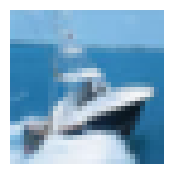

In [34]:
# muestra una imagen
plt.figure(figsize=(2, 2))
plt.imshow(x_train[8])
plt.axis('off')   # quita los ejes
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [35]:
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation=swish, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [38]:
historial = {}
rangos = [1e-5, 5e-4 , 1e-4 , 5e-3 , 1e-3 , 5e-2 , 1e-2]

for lr in rangos:

    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
              metrics=['accuracy'])
    time_ini = time.time()
    hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
    time_fin = time.time()
    
    historial[lr] = {'Tasa aprendizaje': lr, 'Entrenamiento accuracy': hist.history['accuracy'][-1], 
                     'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': time_fin-time_ini}

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.0993 - loss: 2.3094 - val_accuracy: 0.0976 - val_loss: 2.3081
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3078 - val_accuracy: 0.0976 - val_loss: 2.3068
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3066 - val_accuracy: 0.0976 - val_loss: 2.3058
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3056 - val_accuracy: 0.0976 - val_loss: 2.3050
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3049 - val_accuracy: 0.0976 - val_loss: 2.3044
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3044 - val_accuracy: 0.0976 - val_loss: 2.3040
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3040 - val_accuracy: 0.0976 - val_loss: 2.3037
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0993 - loss: 2.3036 -

In [48]:
mejor_lr = 0
mejor_val_acc = -2
for k,value in historial.items(): 
    txt = ''
    for key in value.keys(): txt += str(key)+': '+str(value[key])+'    '
    print(txt)
    if mejor_val_acc < value['Validacion accuracy']:
        mejor_val_acc = value['Validacion accuracy']
        mejor_lr = k
print('Mejor lr: ',mejor_lr)

Tasa aprendizaje: 5e-05    Entrenamiento accuracy: 0.10000000149011612    Validacion accuracy: 0.09759999811649323    Tiempo: 61.751827239990234    
Tasa aprendizaje: 0.1    Entrenamiento accuracy: 0.10028000175952911    Validacion accuracy: 0.10100000351667404    Tiempo: 66.96201610565186    
Tasa aprendizaje: 0.0005    Entrenamiento accuracy: 0.09762000292539597    Validacion accuracy: 0.10080000013113022    Tiempo: 64.0866870880127    
Tasa aprendizaje: 0.0001    Entrenamiento accuracy: 0.0966000035405159    Validacion accuracy: 0.10080000013113022    Tiempo: 60.69278573989868    
Tasa aprendizaje: 0.005    Entrenamiento accuracy: 0.09865999966859818    Validacion accuracy: 0.10080000013113022    Tiempo: 60.71351885795593    
Tasa aprendizaje: 0.001    Entrenamiento accuracy: 0.09781999886035919    Validacion accuracy: 0.10080000013113022    Tiempo: 66.50485682487488    
Tasa aprendizaje: 0.05    Entrenamiento accuracy: 0.0996600016951561    Validacion accuracy: 0.10260000079870224 

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./recursos/checkpoint/4_6_D_checkpoints.weights.h5", save_weights_only=True)

hist = model.fit(x_train, y_train, epochs=70, validation_data=(x_val, y_val), 
                     callbacks=[checkpoint_cb,early_stopping_cb])


model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
            optimizer=tf.keras.optimizers.Nadam(learning_rate=mejor_lr),   # asignar tasa de aprendizaje
            metrics=['accuracy'])
time_ini = time.time()
hist = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val))
time_fin = time.time()

historial[mejor_lr] = ({'Tasa aprendizaje': mejor_lr, 'Entrenamiento accuracy': hist.history['accuracy'][-1], 
                    'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': time_fin-time_ini})

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [50]:
# crear red
model = tf.keras.Sequential()      # creacion del modelo
model.add(tf.keras.layers.Input(shape=(32,32,3)))    # capa entrada,   shape= imagen de 32x32 a color 3
model.add(tf.keras.layers.Flatten())      # capa flatten
model.add(tf.keras.layers.Normalization(input_shape=(32,32,3)))
for i in range(20):        
    model.add(tf.keras.layers.Dense(100, activation=swish, kernel_initializer='he_normal'))    # las 20 capas ocultas de 100 neuronas activacion swish
model.add(tf.keras.layers.Dense(10, activation="softmax"))     # capa salida 

# entrenar
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
            optimizer=tf.keras.optimizers.Nadam(learning_rate=lr),  
            metrics=['accuracy'])
time_ini = time.time()
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
time_fin = time.time()

historial[lr] = {'Tasa aprendizaje': lr, 'Entrenamiento accuracy': hist.history['accuracy'][-1], 
                    'Validacion accuracy': hist.history['val_accuracy'][-1], 'Tiempo': time_fin-time_ini,
                    'Mejor epoca':0}

/home/iabd/anaconda3/envs/iabd_3_9/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.